In [1]:
import pandas as pd
import numpy as np
import os

from pathlib import Path

from IPython.lib.display import Audio

import librosa
import librosa.display

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
root = '/Users/haohe/Desktop/Heart_shenzhen'
audio_data = root + '/audio'
data = root + '/data'

In [3]:
df_train = pd.read_csv(data+'/train.csv')
df_train.head()

,filename,orig_filename,id,name,eng_name,gender,cul,hometown,age,height,weight,temp,bpm,tsh,t4,t3
0,train_0043.wav,524215/Ausculation_Report_Eko_Recording_140111...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
1,train_0209.wav,524215/Ausculation_Report_Eko_Recording_140114...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
2,train_0200.wav,524215/Ausculation_Report_Eko_Recording_140112...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
3,train_0201.wav,524215/Ausculation_Report_Eko_Recording_140113...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
4,train_0159.wav,615897/Ausculation_Report_Eko_Recording_141773...,615897,叶晓霞,"Ye,Xiaoxia",2=女,1=汉族,永嘉,69,156.0,50.0,36.9,60.0,2.53,12.34,4.2


In [4]:
test_file = audio_data +'/train_0043.wav'

In [5]:
Audio(audio_data +'/train_0043.wav')

In [19]:
x, sr = librosa.load(test_file,sr=4000)
print(type(x),type(sr))
print(x.shape,sr)

<class 'numpy.ndarray'> <class 'int'>
(120224,) 4000


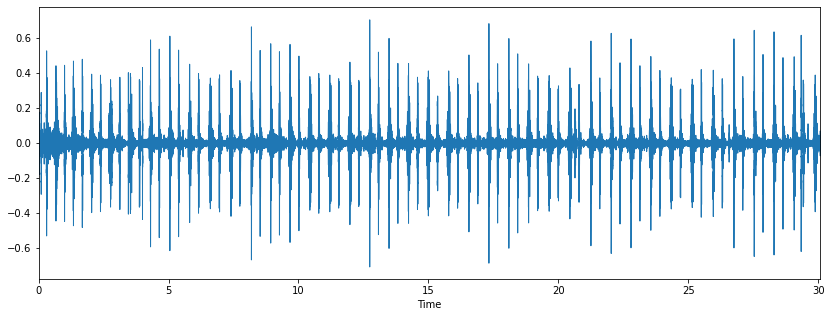

In [20]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x,sr=sr)

# Mel spec

In [6]:
import soundfile as sf

In [95]:
x,sr = sf.read(test_file)
x.shape,sr

((120224,), 4000)

In [96]:
PERIOD = 30
len_x = len(x)
efficient_len = sr * PERIOD

if len_x < efficient_len:
    new_x = np.zeros(efficient_len,dtype=x.dtype)
    start = np.random.randint(efficient_len - len_x)
    new_x[start:start + len_x] = x

elif len_x > efficient_len:
    start = np.random.randint(len_x - efficient_len)
    x = x[start:start+efficient_len].astype(np.float32)

else:
    x = x.astype(np.float32)

In [97]:
melspec = librosa.feature.melspectrogram(x,sr=sr,n_mels=128,n_fft=2048,hop_length=512)

In [98]:
melspec_db = librosa.power_to_db(melspec).astype(np.float32)

In [75]:
melspec_db.shape

(128, 235)

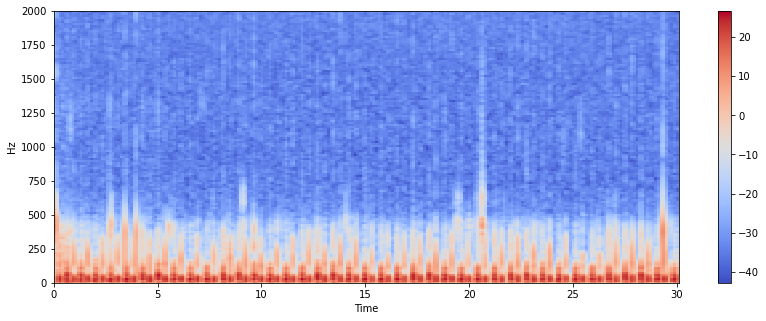

In [76]:
plt.figure(figsize=(14,5))
librosa.display.specshow(melspec_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

In [99]:
x = np.stack([melspec_db,melspec_db,melspec_db],axis=-1)
x.shape

(128, 235, 3)

In [100]:
x = x - x.mean()
xstd = x / (x.std()+1e-6)

In [101]:
_min = xstd.min()
_max = xstd.max()

V = xstd
V[V < _min] = _min
V[V > _max] = _max

V = 255 * (V - _min) / (_max - _min)
V = V.astype(np.uint8)

In [102]:
V = np.moveaxis(V,2,0)
V.shape

(3, 128, 235)

In [103]:
V = (V / 255.0).astype(np.float32)

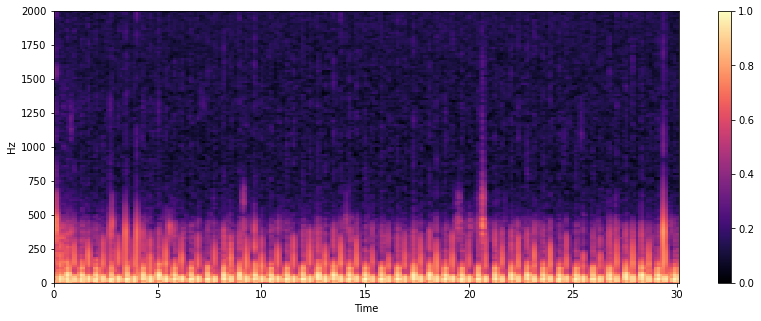

In [104]:
plt.figure(figsize=(14,5))
librosa.display.specshow(V[0,:,:],sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

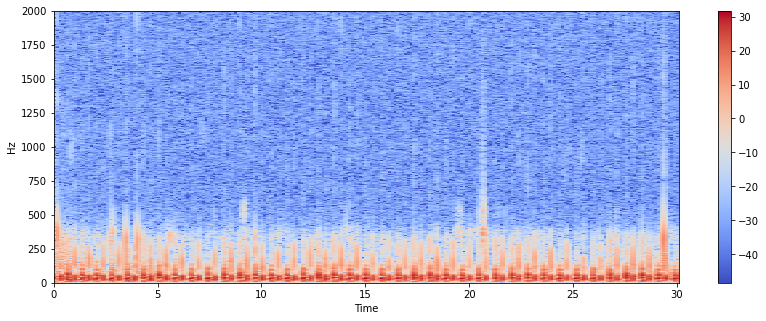

In [21]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

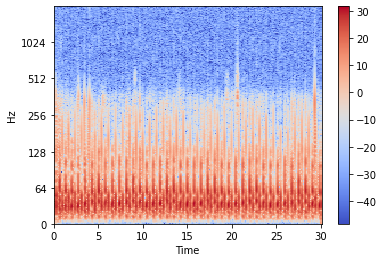

In [61]:
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='log')
plt.colorbar()

In [25]:
import soundfile as sf

In [32]:
sf.info(test_file)

/Users/haohe/Desktop/Heart_shenzhen/audio/train_0043.wav
samplerate: 4000 Hz
channels: 1
duration: 30.056 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

In [45]:
df_train['id'].value_counts()

1431141    18
1108990     8
697972      8
1431305     8
1428695     8
           ..
1425107     4
809747      4
1289229     4
1236635     3
852695      3
Name: id, Length: 77, dtype: int64

In [37]:
df_train['tsh'].describe()

count    394.000000
mean       1.658731
std        1.273600
min        0.015000
25%        0.780000
50%        1.280000
75%        2.057500
max        5.340000
Name: tsh, dtype: float64

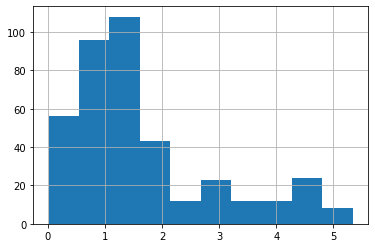

In [35]:
df_train['tsh'].hist()

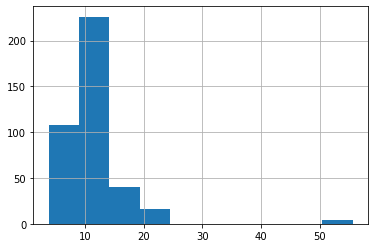

In [43]:
df_train['t4'].hist()

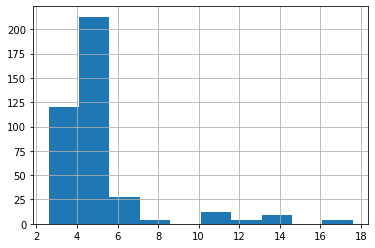

In [44]:
df_train['t3'].hist()